# Matplotlib

Examples of how to create useful plots with just matplotlib and numpy.

Matplotlib documentation:

https://matplotlib.org/stable/api/figure_api.html  
https://matplotlib.org/stable/api/axes_api.html

## Setup

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import math

### Seting plot style

In [2]:
plt.style.use("ggplot")

## X-Y plots

### Plot multiple series on same plot

In [21]:
def plot_sin_x_cos_x():
    # 16 sample points per pi and 1 one additional sample point for 0.0
    x = np.linspace(-2*math.pi, 2*math.pi, 65)
    sin_x = np.sin(x)
    cos_x = np.cos(x)

    fig, ax = plt.subplots(figsize=(16, 5))

    ax.set_title("sin(x) & cos(x)")
    ax.set_xticks(x[::8]) # ticks at elements 0, 8, 16, ... of x

    ax.plot(x, sin_x, linestyle="solid", marker="o", label="sin(x)")
    ax.plot(x, cos_x, linestyle="solid", marker="o", label="cos(x)")

    fig.legend(loc="center right")

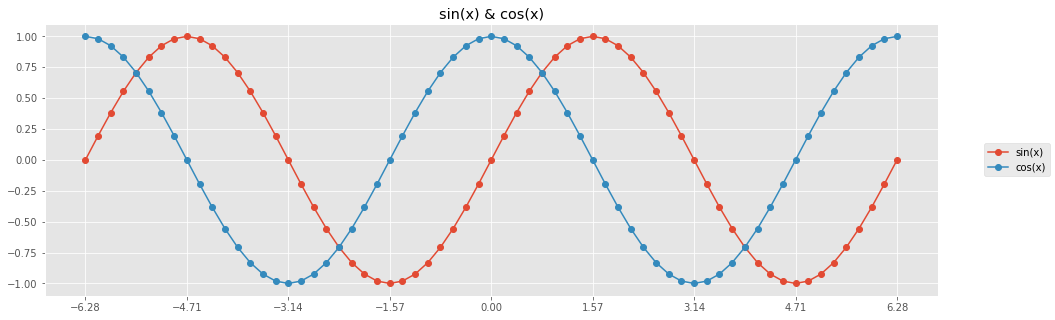

In [22]:
plot_sin_x_cos_x()

### Plot multiple series side-by-side with shared Y axis

In [23]:
def plot_sin_x_cos_x_side_by_side():
    # 16 sample points per pi and 1 one additional sample point for 0.0
    x = np.linspace(-2*math.pi, 2*math.pi, 65)
    sin_x = np.sin(x)
    two_cos_x = 2*np.cos(x)

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5), sharey=True)

    for ax in axs:
        ax.set_xticks(x[::8]) # ticks at elements 0, 8, 16, ... of x

    axs[0].set_title("sin(x)")
    axs[0].plot(x, sin_x, linestyle="solid", marker="o", label="sin(x)")

    axs[1].set_title("2*cos(x)")
    axs[1].plot(x, two_cos_x, linestyle="solid", marker="o", label="sin(x)")
    axs[1].tick_params(axis='both', labelleft=True) # show Y axis lables despite sharey=True

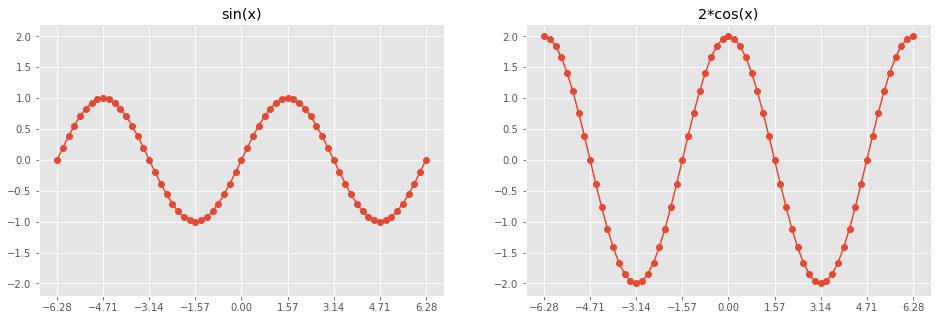

In [24]:
plot_sin_x_cos_x_side_by_side()

## Histograms

### Plot a basic histogram

In [25]:
def plot_histogram():
    sample = np.random.normal(size=1000)
    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.hist(sample)

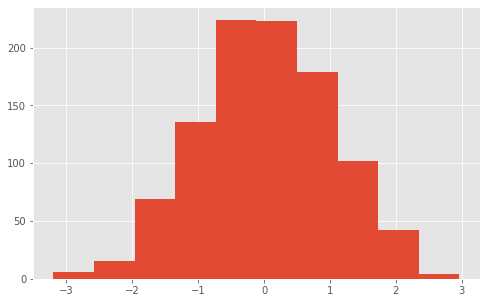

In [26]:
plot_histogram()

### Plot cumulative histogram of multiple series on the same plot

In [27]:
def plot_cumulative_histogram():
    n1 = np.random.normal(loc=-1.0, size=1000)
    n2 = np.random.normal(loc=0.0, size=1000)
    n3 = np.random.normal(loc=1.0, size=1000)

    fig, ax = plt.subplots(figsize=(16,5))

    stacked = np.vstack((n1, n2, n3))
    hist_range = (stacked.min(), stacked.max())
    hist_bins = 100
    hist_kwargs = dict(range=hist_range, bins=hist_bins, cumulative=True, density=True, alpha=0.75)

    ax.hist(n1, **hist_kwargs, label="N(-1.0, 1.0)")
    ax.hist(n2, **hist_kwargs, label="N(0.0, 1.0)")
    ax.hist(n3, **hist_kwargs, label="N(1.0, 1.0)")

    ax.set_xlim(hist_range)
    ax.set_ylim(0, 1)

    fig.legend(loc="center right")

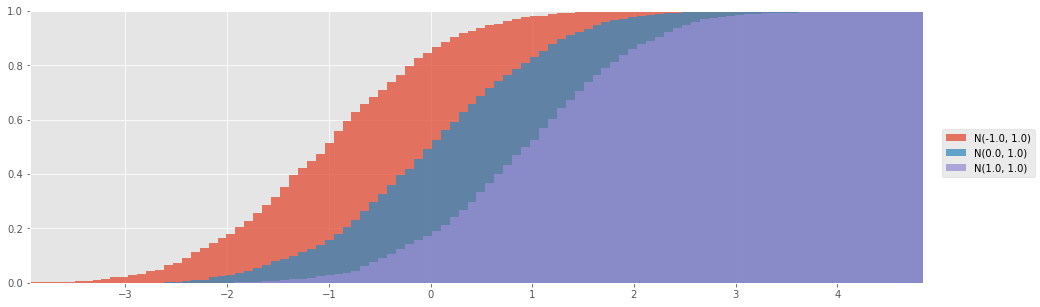

In [28]:
plot_cumulative_histogram()

## Box plots

In [29]:
def plot_boxplot():
    n1 = np.random.normal(loc=-1.0, size=1000)
    n2 = np.random.normal(loc=0.0, size=1000)
    n3 = np.random.normal(loc=1.0, size=1000)

    stacked = np.vstack((n1, n2, n3))
    hist_range = (stacked.min(), stacked.max())
    hist_bins = 100

    fig, ax = plt.subplots(figsize=(16,5))
    ax.boxplot([n1, n2, n3], labels=["N(-1.0, 1.0)", "N(0.0, 1.0)", "N(1.0, 1.0)"])

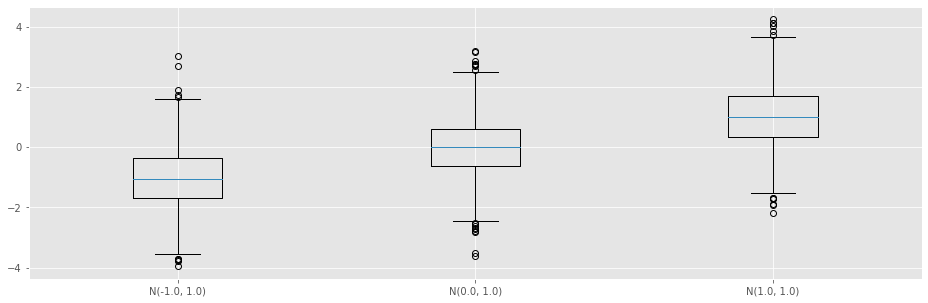

In [30]:
plot_boxplot()